# Md Tamzidul Islam

# Abstract

Various data mining methods have been developed and implemented in various real-world application areas, leading to the usage of such approaches in machine learning scenarios. Several well-known data mining approaches were created and used to do this. Investigate the advantages of utilizing a medical database to predict diseases and treat patients accurately. As previously demonstrated, one of the numerous applications of machine learning technology is the prediction of illness. The construction of a classifier system using machine learning algorithms has the ultimate objective of significantly contributing to the resolution of health-related problems by assisting medical professionals and directly to patients in the prediction and diagnosis of illnesses at an early stage.For the purposes of this study, a machine learning (ML) prediction system has been suggested to predict illnesses based on some of their symptoms. The study employed a data sample of 304 patient records.This project demonstrates an illness prediction system that was built using the Naive Bayes classifier and received accuracy scores ranging from 82 to 90 percent in each example.

# Objective:

The aim of this model is to predict the disease according to the some symptoms of that disease. And the objectives of this project are follows:

•	Do classification(Diseased or Not Diseased) on this data and choose the best model with highest accuracy.

•	To provide no expense disease diagnosis.



# Project Development Steps

1. Analyzing   the   problem   statement    requirements.
2. Collect and clean the data.
3. Prepare data for ML  application
4. Train the models
5. Testing Using Different Models And Evaluating Using Performance Metrics.
6. Compare Models and Select the Best Model
7. Build a Prediction System


# 1. Analyzing   the   problem   statement    requirements.

Determine what we want to anticipate from the issue and what sort of observation data we have to generate those predictions by breaking down the problem into its constituent parts. Predictions are often accompanied with a label or a target response; it might be a yes/no label, a category, or a numerical figure, for example.

# 2. Collect and clean the data.

The first stage is to determine what sort of historical data we have for prediction modeling. The second step is to acquire the data from datasets or from any other data sources that may be available.

In [257]:
# import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [258]:
# Read Dataset 
data=pd.read_csv("heart.csv")
# Findout shape(columns and rows no)
data.shape

(303, 14)

In [259]:
# show the first five rows information
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [260]:
# show the last five rows information
data.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [261]:
# show the dataset information
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


1    165
0    138
Name: output, dtype: int64
1 --> Heart Disease, 0 --> No Heart Disease


<AxesSubplot:>

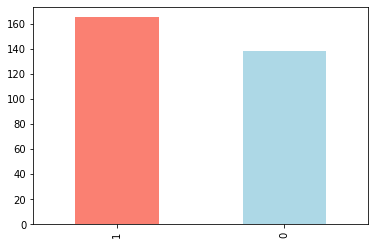

In [262]:
print(data.output.value_counts())
print("1 --> Heart Disease, 0 --> No Heart Disease")
# lets visualize the Output variable
data.output.value_counts().plot(kind="bar",color=["salmon","lightblue"])

In [263]:
#dataset info showing
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [264]:
#Summary statistics of the Series or Dataframe provided.
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [265]:
# findout null value
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

# Heart disease frequency acc to sex

In [266]:
data.sex.value_counts() # 1=male, 0=female

1    207
0     96
Name: sex, dtype: int64

In [267]:
print("207 males and 96 females")
print("1 --> Heart Disease - 165, 0 --> No Heart Disease - 138")
#Compare output column to sex column
pd.crosstab(data.output,data.sex)

207 males and 96 females
1 --> Heart Disease - 165, 0 --> No Heart Disease - 138


sex,0,1
output,,
0,24,114
1,72,93


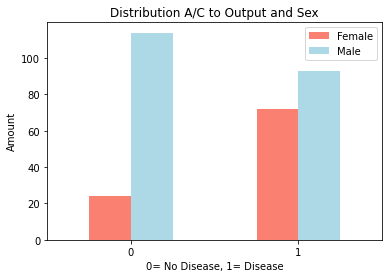

In [268]:
#plotting it for better understanding
pd.crosstab(data.output, data.sex).plot(kind="bar",color = ["salmon","lightblue"])
plt.title("Distribution A/C to Output and Sex")
plt.xlabel("0= No Disease, 1= Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

# Heart disease frequency acc to age

In [269]:
data.age.value_counts() # 1=male, 0=female

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
41    10
64    10
63     9
67     9
65     8
55     8
61     8
53     8
45     8
43     8
42     8
50     7
66     7
48     7
46     7
49     5
47     5
70     4
39     4
68     4
35     4
69     3
40     3
38     3
71     3
37     2
34     2
76     1
29     1
74     1
77     1
Name: age, dtype: int64

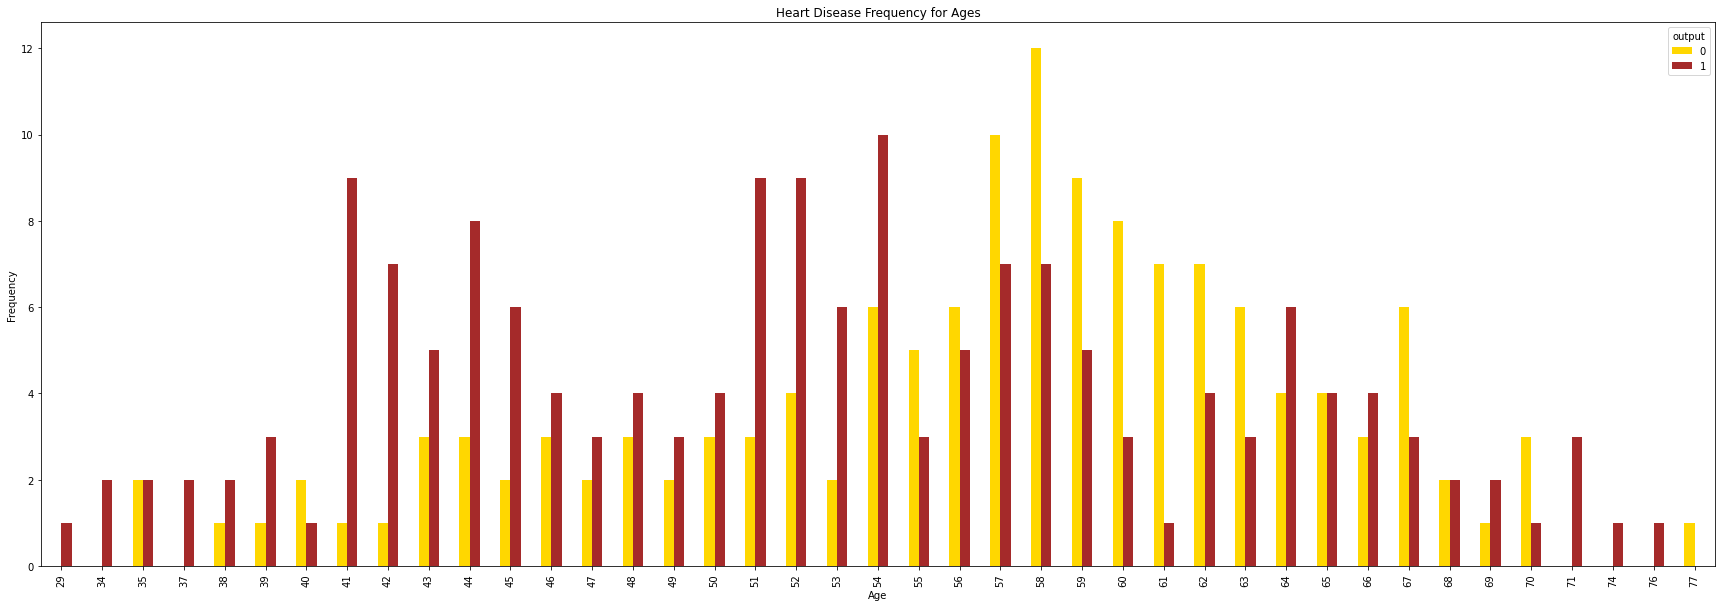

In [270]:
#Heart Disease Frequency for Ages plotting
pd.crosstab(data.age,data.output).plot(kind="bar",figsize=(30,10),color=['gold','brown' ])
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


<AxesSubplot:ylabel='Frequency'>

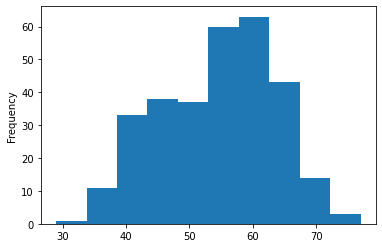

In [271]:
# plotting for age distribution
data.age.plot.hist()

# 3. Prepare data for ML  application

Analyse the data so that it is in a format that the Machine Learning model can comprehend.

In [272]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler #forScaling Preprocessing

In [273]:
{column: len(data[column].unique()) for column in data.columns}

{'age': 41,
 'sex': 2,
 'cp': 4,
 'trtbps': 49,
 'chol': 152,
 'fbs': 2,
 'restecg': 3,
 'thalachh': 91,
 'exng': 2,
 'oldpeak': 40,
 'slp': 3,
 'caa': 5,
 'thall': 4,
 'output': 2}

In [274]:
def onehotencode(df,column_dict):
    df=df.copy()
    for column, prefix in column_dict.items():
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [275]:
def preprocessing(data,scaler):
    data=data.copy()
    
    nominal_features = ['cp', 'slp', 'thall','restecg']
    
    
    
    #One-hot encode the nominal features
    data = onehotencode(data, dict(zip(nominal_features, ['CP', 'SL', 'TH','RECG'])))
    
    
    # Split df into X and y
    y = data['output'].copy()
    X = data.drop('output', axis=1).copy()
    
    #Scale X
    X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    return X,y

In [276]:
X, y = preprocessing(data,StandardScaler())

In [277]:
X

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,caa,CP_0,...,SL_0,SL_1,SL_2,TH_0,TH_1,TH_2,TH_3,RECG_0,RECG_1,RECG_2
0,0.952197,0.681005,0.763956,-0.256334,2.394438,0.015443,-0.696631,1.087338,-0.714429,-0.945384,...,3.664502,-0.926766,-0.939142,-0.081514,3.979112,-1.100763,-0.793116,1.030158,-1.003306,-0.115663
1,-1.915313,0.681005,-0.092738,0.072199,-0.417635,1.633471,-0.696631,2.122573,-0.714429,-0.945384,...,3.664502,-0.926766,-0.939142,-0.081514,-0.251312,0.908461,-0.793116,-0.970725,0.996705,-0.115663
2,-1.474158,-1.468418,-0.092738,-0.816773,-0.417635,0.977514,-0.696631,0.310912,-0.714429,-0.945384,...,-0.272888,-0.926766,1.064802,-0.081514,-0.251312,0.908461,-0.793116,1.030158,-1.003306,-0.115663
3,0.180175,0.681005,-0.663867,-0.198357,-0.417635,1.239897,-0.696631,-0.206705,-0.714429,-0.945384,...,-0.272888,-0.926766,1.064802,-0.081514,-0.251312,0.908461,-0.793116,-0.970725,0.996705,-0.115663
4,0.290464,-1.468418,-0.663867,2.082050,-0.417635,0.583939,1.435481,-0.379244,-0.714429,1.057772,...,-0.272888,-0.926766,1.064802,-0.081514,-0.251312,0.908461,-0.793116,-0.970725,0.996705,-0.115663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,0.478391,-0.101730,-0.417635,-1.165281,1.435481,-0.724323,-0.714429,1.057772,...,-0.272888,1.079021,-0.939142,-0.081514,-0.251312,-1.100763,1.260850,-0.970725,0.996705,-0.115663
299,-1.033002,0.681005,-1.234996,0.342756,-0.417635,-0.771706,-0.696631,0.138373,-0.714429,-0.945384,...,-0.272888,1.079021,-0.939142,-0.081514,-0.251312,-1.100763,1.260850,-0.970725,0.996705,-0.115663
300,1.503641,0.681005,0.706843,-1.029353,2.394438,-0.378132,-0.696631,2.036303,1.244593,1.057772,...,-0.272888,1.079021,-0.939142,-0.081514,-0.251312,-1.100763,1.260850,-0.970725,0.996705,-0.115663
301,0.290464,0.681005,-0.092738,-2.227533,-0.417635,-1.515125,1.435481,0.138373,0.265082,1.057772,...,-0.272888,1.079021,-0.939142,-0.081514,-0.251312,-1.100763,1.260850,-0.970725,0.996705,-0.115663


In [278]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

# 4. Train the model

It is critical to divide the data into training and evaluation sets before training the model because we need to assess how effectively a model generalizes to previously unknown data. The algorithm will now learn the pat- tern and mapping between the feature and the label that has been established.

In [279]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 40)
print("X.shape = ",X.shape, "X_train.shape = ",X_train.shape, "X_test.shape = ",X_test.shape)

X.shape =  (303, 23) X_train.shape =  (242, 23) X_test.shape =  (61, 23)


# 5. Testing Using Different Models And Evaluating Using Performance Metrics

Accuracy is a metric used to de- termine how well or poorly a model performs on a validation set that has not yet been observed. Assess the model’s performance on validation sets in light of the present learning.Test the model with data that is not known.  When the system begins to function correctly, the model is considered complete.
Confusion Matrix is made up of four elements, which are listed below. a) TN: True Negative, when the ham sample was projected to be ham. b) TP: True Positive, when the spam sample is anticipated to be spam. c) FP: False Positive, which occurs when a spam sample is believed to be ham. d) FN: False Negative, in which the ham sample was anticipated to be spam.We can generate equation using confusion Metrics.

Accuracy = (TN + TP)/(TN + TP + FN + FP)

Recall = TP/TP + FN

Precession = TP/TP + FP

f1 − square = 2 ∗ (Precession ∗ Recall)/(Precession + Recall)

# 1. LogisticRegression

The logistic function is used in this machine learning approach to measure the connection between the independent variable and category dependent variable.

In [280]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

lr_model=lr.fit(X_train,y_train)
lr_pred=lr_model.predict(X_test)

In [281]:
from sklearn.metrics import confusion_matrix

CMatrixlr=confusion_matrix(y_test,lr_pred)
CMatrixlr

array([[22,  4],
       [ 2, 33]], dtype=int64)

<AxesSubplot:>

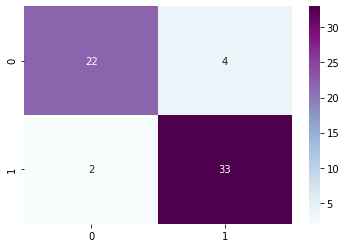

In [282]:
import seaborn as sns
sns.heatmap(CMatrixlr, annot=True,cmap='BuPu')

In [283]:
TP=CMatrixlr[0][0]
TN=CMatrixlr[1][1]
FN=CMatrixlr[1][0]
FP=CMatrixlr[0][1]
print('Testing Accuracy For LR:',(TP+TN)/(TP+TN+FN+FP))

Testing Accuracy For LR: 0.9016393442622951


In [284]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,lr_pred))
print("Logistic Regression Accuracy: {:.2f}%".format(accuracy_score(y_test,lr_pred)*100))

0.9016393442622951
Logistic Regression Accuracy: 90.16%


In [285]:
from sklearn.metrics import classification_report
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        26
           1       0.89      0.94      0.92        35

    accuracy                           0.90        61
   macro avg       0.90      0.89      0.90        61
weighted avg       0.90      0.90      0.90        61



LR ROC Accuracy: 0.8945
LR ROC Curve:


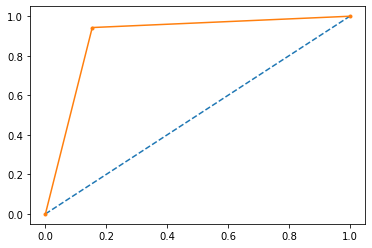

In [286]:
from sklearn. metrics import classification_report, roc_auc_score, roc_curve
lr_roc = roc_auc_score(y_test, lr_pred)
print("LR ROC Accuracy:",round(lr_roc,4))
print("LR ROC Curve:")
from matplotlib import pyplot as plt
fpr, tpr, threholds = roc_curve(y_test, lr_pred)
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], linestyle="--")
ax.plot(fpr, tpr, marker=".")
plt.show(fig)

# 2 Support Vector Machine

The support vector machine algorithmic rule seeks a hyperplane that clearly categorizes data points in an N dimensional space where N is the number of attributes.There are a few possible hyper planes that might be used to divide the two groups of knowledge points. Finding the plane with the greatest margin that is, the greatest separation between each category’s knowledge points is our goal. In order to increase the confidence in the classification of upcoming knowledge points, the margin
distance should be maximized.

In [287]:
from sklearn.svm import SVC
svm=SVC()

svm_model=svm.fit(X_train,y_train)
svm_pred=svm_model.predict(X_test)

[[19  7]
 [ 4 31]]


<AxesSubplot:>

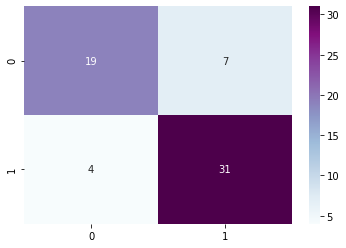

In [288]:
CMatrixsvm=confusion_matrix(y_test,svm_pred)
print(CMatrixsvm)
sns.heatmap(CMatrixsvm, annot=True,cmap='BuPu')

In [289]:
TP=CMatrixsvm[0][0]
TN=CMatrixsvm[1][1]
FN=CMatrixsvm[1][0]
FP=CMatrixsvm[0][1]
print('Testing Accuracy For SVM:',(TP+TN)/(TP+TN+FN+FP))

Testing Accuracy For SVM: 0.819672131147541


In [290]:
print(accuracy_score(y_test,svm_pred))
print("SVM Accuracy: {:.2f}%".format(accuracy_score(y_test,svm_pred)*100))
print(classification_report(y_test, svm_pred))

0.819672131147541
SVM Accuracy: 81.97%
              precision    recall  f1-score   support

           0       0.83      0.73      0.78        26
           1       0.82      0.89      0.85        35

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61



SVM ROC Accuracy: 0.8082
SVM ROC Curve:


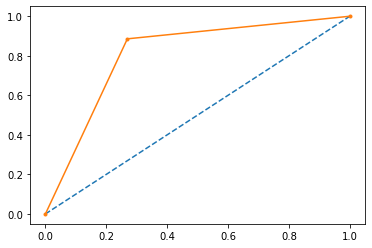

In [291]:
from sklearn. metrics import classification_report, roc_auc_score, roc_curve
svm_roc = roc_auc_score(y_test, svm_pred)
print("SVM ROC Accuracy:",round(svm_roc,4))
print("SVM ROC Curve:")
from matplotlib import pyplot as plt
fpr, tpr, threholds = roc_curve(y_test, svm_pred)
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], linestyle="--")
ax.plot(fpr, tpr, marker=".")
plt.show(fig)

# 3 Naive Bayes Classifier

The Bayes’ Theorem, which presumes that features are statistically independent,can be used in supervised machine learning to create a Naive Thomas Bayes Classifier.The idea is based on the false assumption that input variables are independent of all alternatives, i.e., that once one variable is known, there is no way to know anything about alternative variables. Despite this assumption, it has shown to be a classifier that yields reliable results. Naive Bayes Classifiers are built on the Bayes Theorem, or more simply, the probability that an event (A) will occur given that an earlier event (B) has already occurred. In essence, the theorem allows a hypothesis to be changed whenever new evidence is offered.The following equation translates Bayes’ Theorem into probability terms:
                                          P(A|B) = P(B|A)P(A)/P(B)

In [292]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

nb_model=lr.fit(X_train,y_train)
nb_pred=lr_model.predict(X_test)

[[22  4]
 [ 2 33]]


<AxesSubplot:>

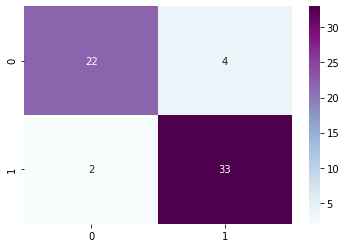

In [293]:
CMatrixnb=confusion_matrix(y_test,lr_pred)
print(CMatrixnb)
sns.heatmap(CMatrixnb, annot=True,cmap='BuPu')

In [294]:
TP=CMatrixnb[0][0]
TN=CMatrixnb[1][1]
FN=CMatrixnb[1][0]
FP=CMatrixnb[0][1]
print('Testing Accuracy For NB:',(TP+TN)/(TP+TN+FN+FP))

Testing Accuracy For NB: 0.9016393442622951


In [295]:
print(accuracy_score(y_test,nb_pred))
print("Naive Bayes Classifier Accuracy: {:.2f}%".format(accuracy_score(y_test,nb_pred)*100))
print(classification_report(y_test, nb_pred))

0.9016393442622951
Naive Bayes Classifier Accuracy: 90.16%
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        26
           1       0.89      0.94      0.92        35

    accuracy                           0.90        61
   macro avg       0.90      0.89      0.90        61
weighted avg       0.90      0.90      0.90        61



NB ROC Accuracy: 0.8945
NB ROC Curve:


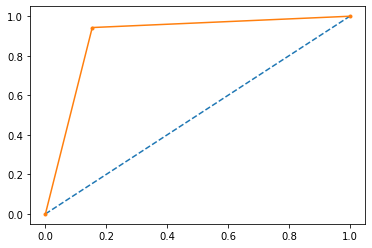

In [296]:
from sklearn. metrics import classification_report, roc_auc_score, roc_curve
nb_roc = roc_auc_score(y_test, nb_pred)
print("NB ROC Accuracy:",round(nb_roc,4))
print("NB ROC Curve:")
from matplotlib import pyplot as plt
fpr, tpr, threholds = roc_curve(y_test, nb_pred)
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], linestyle="--")
ax.plot(fpr, tpr, marker=".")
plt.show(fig)

# 4.MLP classification

1. MLPClassifier stands for Multi-layer Perceptron classifier
2. A multilayer perceptron (MLP) is a feedforward artificial neural network that generates a set of outputs from a set of inputs. An MLP is characterized by several layers of input nodes connected as a directed graph between the input and output layers. MLP uses backpropogation for training the network. MLP is a deep learning method.

In [297]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()
mlp_model=model.fit(X_train,y_train)
mlp_pred=mlp_model.predict(X_test)

[[21  5]
 [ 3 32]]


<AxesSubplot:>

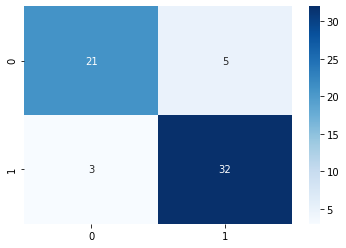

In [298]:
CMatrixmlp=confusion_matrix(y_test,mlp_pred)
print(CMatrixmlp)
sns.heatmap(CMatrixmlp, annot=True,cmap="Blues")

In [299]:
TP=CMatrixmlp[0][0]
TN=CMatrixmlp[1][1]
FN=CMatrixmlp[1][0]
FP=CMatrixmlp[0][1]
print('Testing Accuracy For MLP:',(TP+TN)/(TP+TN+FN+FP))

Testing Accuracy For MLP: 0.8688524590163934


In [300]:
accuracy_score(y_test,mlp_pred)*100
print("Neural Network Accuracy MLP: {:.2f}%".format(accuracy_score(y_test,mlp_pred)*100))

Neural Network Accuracy MLP: 86.89%


In [301]:
print(accuracy_score(y_test,mlp_pred))
print("MLP Accuracy: {:.2f}%".format(accuracy_score(y_test,mlp_pred)*100))
print(classification_report(y_test, nb_pred))

0.8688524590163934
MLP Accuracy: 86.89%
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        26
           1       0.89      0.94      0.92        35

    accuracy                           0.90        61
   macro avg       0.90      0.89      0.90        61
weighted avg       0.90      0.90      0.90        61



MLP ROC Accuracy: 0.861
MLP ROC Curve:


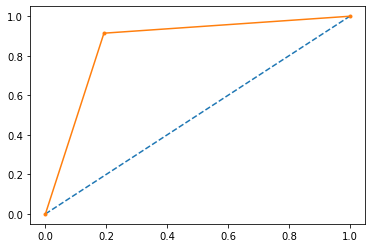

In [302]:
from sklearn. metrics import classification_report, roc_auc_score, roc_curve
mlp_roc = roc_auc_score(y_test, mlp_pred)
print("MLP ROC Accuracy:",round(mlp_roc,4))
print("MLP ROC Curve:")
from matplotlib import pyplot as plt
fpr, tpr, threholds = roc_curve(y_test, mlp_pred)
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], linestyle="--")
ax.plot(fpr, tpr, marker=".")
plt.show(fig)

# 5. ANN Classification

The network has 4 layers, 3 hidden layer and an output layer. The hidden layer will use the relu function for activations and the output layer will use the sigmoid funtion for activations (For Binary Results). The output layer has only one node and is used for the regression, the output of the node is the same as the input of the node.

1. That is, the activation function is f(x)=x . A function that takes the input signal and generates an output signal, but takes into account the threshold, is called an activation function. We work through each layer of our network calculating the outputs for each neuron. All of the outputs from one layer become inputs to the neurons on the next layer. This process is called forward propagation.

2. We use the weights to propagate signals forward from the input to the output layers in a neural network. We use the weights to also propagate error backwards from the output back into the network to update our weights. This is called backpropagation.

In [303]:
#from keras.models import Sequential
#from keras.layers import Conv2D, MaxPooling2D
#from keras.layers import Activation, Dropout, Flatten, Dense
import keras
from keras.models import Model
from keras.layers import Dense, Input

In [304]:
#funtionalAPI
#inputlayer
input1 = Input(shape=(X_train.shape[1]))

#hidden layer1
hidden1 = Dense(48, activation='relu')(input1)
#D1 = Dropout(0.5)(hidden1)

#hidden layer2
hidden2 = Dense(30, activation='relu')(hidden1)
#D2 = Dropout(0.5)(hidden2)

#hidden layer3
hidden3 = Dense(14, activation='relu')(hidden2)
#D3 = Dropout(0.5)(hidden3)

#output layer
output = Dense(1, activation='sigmoid')(hidden3)

ann_model = Model(inputs=input1, outputs=output)
ann_model.summary()

#Compiling the model
ann_model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 23)]              0         
                                                                 
 dense_20 (Dense)            (None, 48)                1152      
                                                                 
 dense_21 (Dense)            (None, 30)                1470      
                                                                 
 dense_22 (Dense)            (None, 14)                434       
                                                                 
 dense_23 (Dense)            (None, 1)                 15        
                                                                 
Total params: 3,071
Trainable params: 3,071
Non-trainable params: 0
_________________________________________________________________


In [305]:
# Creating a callback for ANN model
from tensorflow.keras.callbacks import EarlyStopping
earlystopping= EarlyStopping(monitor='val_loss', mode='min', patience=5)

In [306]:
# Fittitng the ANN model with training dataset
ann_model_op = ann_model.fit(X_train, y_train, batch_size = 25, epochs = 60,validation_data=[X_test,y_test],callbacks=[earlystopping])
ann_model.fit(X_train, y_train, batch_size = 25, epochs = 60,validation_data=[X_test,y_test],callbacks=[earlystopping])

Epoch 1/60
10/10 [==============================] - 1s 17ms/step - loss: 0.7003 - accuracy: 0.5496 - val_loss: 0.6379 - val_accuracy: 0.6066
Epoch 2/60
10/10 [==============================] - 0s 4ms/step - loss: 0.6201 - accuracy: 0.6074 - val_loss: 0.5865 - val_accuracy: 0.7705
Epoch 3/60
10/10 [==============================] - 0s 6ms/step - loss: 0.5624 - accuracy: 0.7355 - val_loss: 0.5436 - val_accuracy: 0.8033
Epoch 4/60
10/10 [==============================] - 0s 4ms/step - loss: 0.5137 - accuracy: 0.8099 - val_loss: 0.5060 - val_accuracy: 0.8033
Epoch 5/60
10/10 [==============================] - 0s 4ms/step - loss: 0.4735 - accuracy: 0.8140 - val_loss: 0.4736 - val_accuracy: 0.8361
Epoch 6/60
10/10 [==============================] - 0s 5ms/step - loss: 0.4391 - accuracy: 0.8347 - val_loss: 0.4479 - val_accuracy: 0.8361
Epoch 7/60
10/10 [==============================] - 0s 4ms/step - loss: 0.4089 - accuracy: 0.8430 - val_loss: 0.4270 - val_accuracy: 0.8525
Epoch 8/60
10/10 [=

In [307]:
ann_pred = (ann_model.predict(X_test) > 0.5).astype("int32")

2/2 [==============================] - 0s 13ms/step


[[20  6]
 [ 5 30]]


<AxesSubplot:>

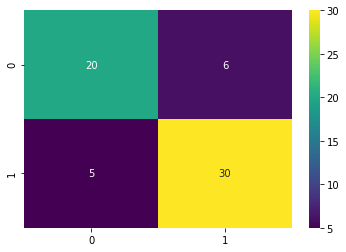

In [308]:
CMatrixann=confusion_matrix(y_test,ann_pred)
print(CMatrixann)
sns.heatmap(CMatrixann, annot=True,cmap="viridis")

In [309]:
TP=CMatrixann[0][0]
TN=CMatrixann[1][1]
FN=CMatrixann[1][0]
FP=CMatrixann[0][1]
print('Testing Accuracy For ANN:',(TP+TN)/(TP+TN+FN+FP))

Testing Accuracy For ANN: 0.819672131147541


In [310]:
print(accuracy_score(y_test,ann_pred))
print("Naive Bayes Classifier Accuracy: {:.2f}%".format(accuracy_score(y_test,ann_pred)*100))
print(classification_report(y_test, ann_pred))

0.819672131147541
Naive Bayes Classifier Accuracy: 81.97%
              precision    recall  f1-score   support

           0       0.80      0.77      0.78        26
           1       0.83      0.86      0.85        35

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61



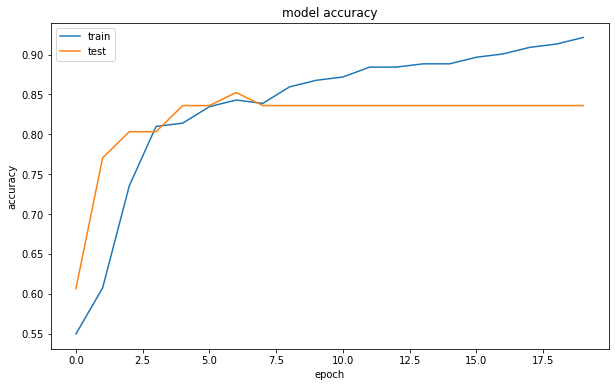

In [311]:
#UnderStanding of ANN Output by Plotting
# summarize history for accuracy
#plt.rcParams["figure.figsize"] = (10,8)
plt.figure(figsize=(10, 6))
plt.plot(ann_model_op.history['accuracy'])
plt.plot(ann_model_op.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 6. Compare Models and Select the Best Model

Here I will compare differents model and according to accuracy I will select the best model

In [312]:
final_data=pd.DataFrame({'Models':['LR','SVM','NB','MLP','ANN'],
                        'Accuracy':[accuracy_score(y_test,lr_pred)*100,accuracy_score(y_test,svm_pred)*100,accuracy_score(y_test,nb_pred)*100,accuracy_score(y_test,mlp_pred)*100,accuracy_score(y_test,ann_pred.round())*100]})
final_data

,Models,Accuracy
0,LR,90.163934
1,SVM,81.967213
2,NB,90.163934
3,MLP,86.885246
4,ANN,81.967213


<AxesSubplot:xlabel='Models', ylabel='Accuracy'>

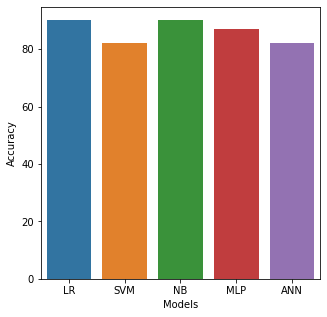

In [313]:
plt.figure(figsize=(5, 5))
sns.barplot(x =final_data['Models'], y =final_data['Accuracy'])

# 7. Build a Prediction System

I will build a predection system by Naive Bayes Classifier.

In [314]:
#we have trained our model on X_train and y_train (means on 80% data only).
#Before model deployment, we have to train our selected mode on 100% data.
#So let’s train our NB model on 100% data.

In [315]:
y = data['output'].copy()
X = data.drop('output', axis=1).copy()
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(X,y)

MultinomialNB()

In [316]:
#Type 1 Of Predicting
input_data = (52,1,2,172,199,1,1,162,0,0.5,2,0,3)

# change the input data to a numpy array
numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = numpy_array.reshape(1,-1)

#predictionT1 
predictionT1 = nb.predict(input_data_reshaped)


In [317]:
print(predictionT1)

if (predictionT1[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


In [318]:
#Type 2 Of Predicting
newdata= pd.DataFrame({'age':52, 'sex':1, 'cp':2, 'trestbps':172, 'chol':199, 'fbs':1, 'restecg':1, 'thalach':162,
                        'exang':0, 'oldpeak':0.5, 'slp':2, 'ca':0, 'thall':3},index=[0])

#predictionT2
predictionT2 = nb.predict(newdata)
newdata

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slp,ca,thall
0,52,1,2,172,199,1,1,162,0,0.5,2,0,3


In [319]:
print(predictionT2)

if (predictionT2[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


# Conclusion

To summarize, our approach is beneficial to individuals who are always concerned about their health and want to know what is going on within their bodies through information. Our major goal in developing this system is to get to know them and learn about their health and wellness practices. Those suffering from mental illnesses such as depression or anxiety are especially vulnerable. This group's members are capable of overcoming their difficulties and returning to their old life. The accuracy of sickness prediction will be increased as a result of the user's symptoms. Furthermore, the system will provide inspirational words and pictures to help the user stay motivated.